In [16]:
import os
import pandas as pd
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt

In [17]:
control_csv_path = '../CSV_metadata/metadata_control_2.csv'
pd_csv_path = '../CSV_metadata/metadata_PD_2.csv'

In [18]:
control_df = pd.read_csv(control_csv_path)
control_df.head()

,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,weightKg,...,Flip Angle,Acquisition Plane,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Manufacturer,Mfg Model,Field Strength
0,401,Control,100890,Baseline,171714,1063522,M,78.23,Y,78.3,...,9.0,SAGITTAL,256.0,256.0,192.0,1.00000,1.00000,Philips Medical Systems,Achieva dStream,3.0
1,401,Control,100890,Baseline,171714,1063523,M,78.23,Y,78.3,...,90.0,SAGITTAL,256.0,256.0,192.0,1.00000,1.00000,Philips Medical Systems,Achieva dStream,3.0
2,40,Control,101039,Baseline,172287,1066201,F,63.20,Y,78.0,...,9.0,SAGITTAL,256.0,256.0,192.0,1.00000,1.00000,Philips Medical Systems,Ingenia,3.0
3,40,Control,101039,Baseline,172287,1066205,F,63.20,Y,78.0,...,90.0,SAGITTAL,288.0,288.0,192.0,0.88889,0.88889,Philips Medical Systems,Ingenia,3.0
4,17,Control,101195,Baseline,172301,1066282,M,73.79,Y,84.1,...,40.0,AXIAL,448.0,448.0,16.0,0.50000,0.50000,SIEMENS,Prisma_fit,3.0


In [19]:
PD_df = pd.read_csv(pd_csv_path)
PD_df.head()
print(len(PD_df))

4057


In [20]:
subjectIdentifier_PD = PD_df['subjectIdentifier'].tolist()

In [21]:
print(len(subjectIdentifier_PD), len(set(subjectIdentifier_PD)))

4057 640


In [22]:
PD_unique_subjects = PD_df[PD_df['Weighting'] == 'T1']
len(PD_unique_subjects)

1529

In [23]:
PD_unique_subjects = PD_unique_subjects.groupby(['subjectIdentifier']).size().reset_index(name='counts')
len(PD_unique_subjects)

566

In [24]:
PD_unique_subjects[PD_unique_subjects['counts'] > 1]

,subjectIdentifier,counts
4,3007,2
36,3102,3
37,3105,4
38,3107,6
39,3108,4
...,...,...
560,102293,3
561,102420,5
562,102484,3
563,102978,5


In [25]:
PD_df.keys()

Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength'],
      dtype='object')

In [26]:
siteKey_counts = PD_df.groupby(['siteKey']).size().reset_index(name='counts')
siteKey_counts.head()

,siteKey,counts
0,1,67
1,2,3
2,6,83
3,7,262
4,12,25


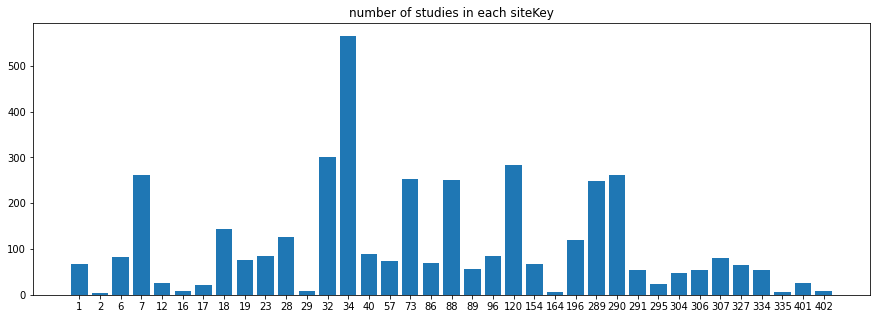

In [27]:
siteKey_count_dic = {}
for index, row in siteKey_counts.iterrows():
    siteKey_count_dic[str(row['siteKey'])] = row['counts']

plt.figure(figsize = (15, 5))    
X_axis = np.arange(len(siteKey_count_dic.keys()))
plt.bar(siteKey_count_dic.keys(), siteKey_count_dic.values()) 
plt.xticks(X_axis, siteKey_count_dic.keys())
plt.title('number of studies in each siteKey')



# X_axis = np.arange(len(siteKey_lists))
# plt.figure(figsize = (15, 5)) 
# plt.bar(X_axis - 0.2, female_counts, 0.4, label = 'Female')
# plt.bar(X_axis + 0.2, male_counts, 0.4, label = 'Male')
  

# plt.xlabel("Groups")
# plt.ylabel("Number of Studies")
# plt.title("Counts")
# plt.legend()
plt.savefig('siteKey.png', dpi=1000)
plt.show()

In [28]:
siteKey_sex_counts = PD_df.groupby(['siteKey', 'subjectSex']).size().reset_index(name='counts')
siteKey_sex_counts.head()

,siteKey,subjectSex,counts
0,1,F,28
1,1,M,39
2,2,F,3
3,6,F,40
4,6,M,43


In [29]:
uni_sex_site_key = [2, 16, 29, 304, 335, 402]
### (2, 'F'): 3, (16, 'M'): 8, (29, 'M'): 9, (304, 'M'): 48, (335, 'F'): 6, (402, 'F'): 9}

In [30]:
siteKey_sex_counts_droped = siteKey_sex_counts[~siteKey_sex_counts['siteKey'].isin(uni_sex_site_key)]
print(len(siteKey_sex_counts_droped), len(siteKey_sex_counts))

62 68


In [31]:
Female_df = siteKey_sex_counts_droped[siteKey_sex_counts['subjectSex'] == 'F']
Male_df = siteKey_sex_counts_droped[siteKey_sex_counts['subjectSex'] == 'M']
female_counts = Female_df['counts'].tolist()
male_counts = Male_df['counts'].tolist()
siteKey_lists = Male_df['siteKey'].tolist()

/tmp/ipykernel_78430/2100348148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Female_df = siteKey_sex_counts_droped[siteKey_sex_counts['subjectSex'] == 'F']
/tmp/ipykernel_78430/2100348148.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Male_df = siteKey_sex_counts_droped[siteKey_sex_counts['subjectSex'] == 'M']


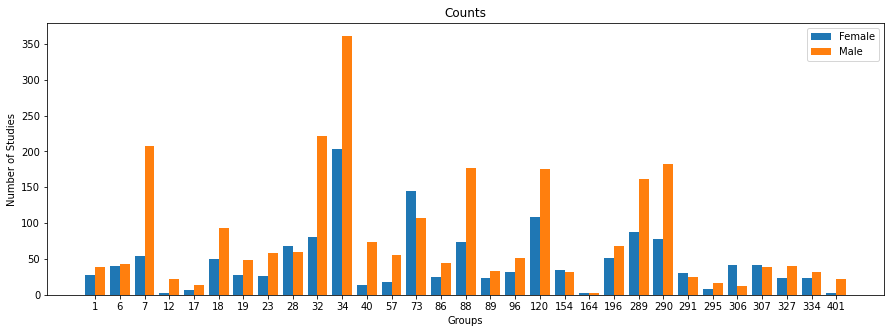

In [32]:
X_axis = np.arange(len(siteKey_lists))
plt.figure(figsize = (15, 5)) 
plt.bar(X_axis - 0.2, female_counts, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male_counts, 0.4, label = 'Male')
  
plt.xticks(X_axis, siteKey_lists)
plt.xlabel("Groups")
plt.ylabel("Number of Studies")
plt.title("Counts")
plt.legend()
plt.show()

In [33]:
Female_df.head()

,siteKey,subjectSex,counts
0,1,F,28
3,6,F,40
5,7,F,54
7,12,F,3
10,17,F,7


In [34]:
Male_df.head()

,siteKey,subjectSex,counts
1,1,M,39
4,6,M,43
6,7,M,208
8,12,M,22
11,17,M,14


In [35]:
siteKey_sex_count_dic

NameError: name 'siteKey_sex_count_dic' is not defined

In [36]:
siteKey_manufacturer_counts = PD_df.groupby(['siteKey', 'Manufacturer']).size().reset_index(name='counts')
siteKey_manufacturer_counts

,siteKey,Manufacturer,counts
0,1,GE MEDICAL SYSTEMS,53
1,1,SIEMENS,14
2,2,GE MEDICAL SYSTEMS,3
3,6,0,20
4,6,Philips Medical Systems,63
5,7,GE MEDICAL SYSTEMS,2
6,7,SIEMENS,260
7,12,SIEMENS,25
8,16,SIEMENS,8
9,17,SIEMENS,21


In [37]:
set(PD_df['Manufacturer'].tolist())

{'0',
 'GE MEDICAL SYSTEMS',
 'Philips Medical Systems',
 'Philips Medical Systems|PMOD Technologies',
 'SIEMENS'}

In [38]:
siteKey_description_counts = PD_df.groupby(['siteKey', 'description']).size().reset_index(name='counts')
siteKey_description_counts


,siteKey,description,counts
0,1,2D GRE-MT,10
1,1,3D T1-WEIGHTED,2
2,1,3D T2 FLAIR,2
3,1,AX 3D FSPGR straight brain lab,1
4,1,AX PD 5/1,1
...,...,...,...
333,402,2D GRE MT,5
334,402,3D T1-weighted,1
335,402,3D T2 FLAIR,1
336,402,rsfMRI_LR,1


In [39]:
siteKey_acquisitionPlane_counts = PD_df.groupby(['siteKey', 'Acquisition Plane']).size().reset_index(name='counts')
siteKey_acquisitionPlane_counts

,siteKey,Acquisition Plane,counts
0,1,AXIAL,46
1,1,SAGITTAL,21
2,2,AXIAL,1
3,2,SAGITTAL,2
4,6,AXIAL,41
...,...,...,...
78,401,AXIAL,3
79,401,CORONAL,6
80,401,SAGITTAL,16
81,402,AXIAL,7


In [40]:
acquisitionPlane_counts = PD_df.groupby(['Acquisition Plane']).size().reset_index(name='counts')
acquisitionPlane_counts

,Acquisition Plane,counts
0,AXIAL,2607
1,CORONAL,67
2,SAGITTAL,1383


In [41]:
### I am going to filter df for T1 and AXIAL ((PD_df['Acquisition Plane'] == 'AXIAL'))

In [42]:
filtered_PD_df = PD_df[(PD_df['Weighting'] == 'T1') & (PD_df['Acquisition Type'] == '3D')] 

In [43]:
len(filtered_PD_df)

1127

In [44]:
siteKey_pulseSequence_counts = filtered_PD_df.groupby(['siteKey', 'Pulse Sequence']).size().reset_index(name='counts')
siteKey_pulseSequence_counts


,siteKey,Pulse Sequence,counts
0,1,GR,17
1,2,GR,2
2,6,GR,21
3,7,GR,1
4,7,GR/IR,100
5,12,GR/IR,9
6,18,GR,25
7,18,GR/IR,5
8,19,GR,18
9,23,GR,19


In [45]:
siteKey_pulseSequence_details_counts = filtered_PD_df.groupby(['siteKey', 'TE', 'TR', 'TI', 'description', 'Manufacturer', 'Mfg Model', 'Acquisition Plane', 'Pulse Sequence']).size().reset_index(name='counts')
siteKey_pulseSequence_details_counts


,siteKey,TE,TR,TI,description,Manufacturer,Mfg Model,Acquisition Plane,Pulse Sequence,counts
0,1,2.084,7.6360,450.0,AX 3D FSPGR straight brain lab,GE MEDICAL SYSTEMS,Signa HDxt,AXIAL,GR,1
1,1,3.180,8.1600,450.0,SAG FSPGR BRAVO,GE MEDICAL SYSTEMS,DISCOVERY MR750,SAGITTAL,GR,1
2,1,3.184,8.1640,450.0,SAG FSPGR BRAVO,GE MEDICAL SYSTEMS,DISCOVERY MR750,SAGITTAL,GR,2
3,1,3.488,8.8240,450.0,SAG 3D FSPGR BRAVO STRAIGHT,GE MEDICAL SYSTEMS,Signa HDxt,SAGITTAL,GR,1
4,1,3.488,8.8240,450.0,sag 3D FSPGR BRAVO straight,GE MEDICAL SYSTEMS,Signa HDxt,SAGITTAL,GR,6
...,...,...,...,...,...,...,...,...,...,...
220,401,2.941,6.5090,0.0,Coronal,Philips Medical Systems,Achieva dStream,CORONAL,GR/GR/GR/GR/GR,1
221,401,2.941,6.5219,0.0,3D T1-weighted,Philips Medical Systems,Achieva dStream,SAGITTAL,GR/GR/GR/GR/GR,1
222,401,2.941,6.5219,0.0,Coronal,Philips Medical Systems,Achieva dStream,CORONAL,GR/GR/GR/GR/GR,1
223,401,2.945,6.5253,0.0,3D T1-weighted,Philips Medical Systems,Achieva dStream,SAGITTAL,GR/GR/GR/GR/GR,1


In [46]:
set(PD_df['description'].tolist())

{'*AX FSE T2',
 '*Ax T2 FSE',
 '2D GRE MT',
 '2D GRE-MT',
 '2D GRE-NM',
 '2D_GRE-MT',
 '3 PLANE LOC',
 '3D SAG',
 '3D Sagittal T1',
 '3D T1',
 '3D T1-WEIGHTED',
 '3D T1-weighted',
 '3D T1-weighted_ND',
 '3D T2 FLAIR',
 '3D T2 FLAIR_ND',
 '3D T2 FLAIR_SAGITAL',
 '3D T2 SAG FLAIR',
 '3D T2 SAG FLAIR_ND',
 '3D-T1-weighted',
 '3D-T1-weighted_SAGITAL',
 '3D_Brain_VIEW_FLAIR_SAG',
 '3D_T1-weighted',
 '3D_T2_FLAIR',
 '3D_T2_FLAIR_SAG INVICCRO T2 FLAIR',
 'AX 3D FSPGR straight brain lab',
 'AX DE TSE',
 'AX DUAL_TSE',
 'AX FLAIR',
 'AX FLAIR T2',
 'AX PD  5/1',
 'AX PD + T2',
 'AX T1',
 'AX T1 FLAIR',
 'AX T1 SE C+',
 'AX T2',
 'AX T2 AC-PC LINE ENTIRE BRAIN',
 'AX T2 AC-PC line Entire Brain',
 'AX T2 DE',
 'AX T2 FLAIR',
 'AX T2 FLAIR 5/1',
 'AX T2 Flair',
 'AX T2 GRE MT',
 'AXIAL  T2  FSE',
 'AXIAL 2D GRE-MT',
 'AXIAL FLAIR',
 'AXIAL FSE T2 FS',
 'AXIAL PD+T2 TSE',
 'AXIAL PD-T2 TSE FS',
 'AXIAL T1 3D MPRAGE',
 'Accelerated Sag IR-FSPGR',
 'Ax 3D SWAN GRE straight',
 'Ax FLAIR',
 'Ax FSE T2'

In [47]:
with open('PD_groupby.csv', 'w') as f:
    f.write('siteKey,TE,TR,TI,description,manufacturer,mfg model,acquisition plane,pulse sequence,counts\n')
for index, row in siteKey_pulseSequence_details_counts.iterrows():
    with open('PD_groupby.csv', 'a') as f:
        f.write('{},{},{},{},{},{},{},{},{},{}\n'.format(row['siteKey'], row['TE'], row['TR'], row['TI'], row['description'],
                                                      row['Manufacturer'], row['Mfg Model'], row['Acquisition Plane'],
                                                      row['Pulse Sequence'], row['counts']))

In [48]:
TE_TR_TI_counts = filtered_PD_df.groupby(['TE', 'TR', 'TI']).size().reset_index(name='counts')
TE_TR_TI_counts


,TE,TR,TI,counts
0,1.840,7.3000,0.0,1
1,2.084,7.6360,450.0,1
2,2.148,25.0000,0.0,1
3,2.154,25.0000,0.0,2
4,2.270,1900.0000,900.0,22
...,...,...,...,...
138,4.185,8.8636,0.0,1
139,4.200,12.8360,400.0,1
140,4.200,13.0000,400.0,11
141,5.168,12.3080,500.0,15


In [49]:
TE_TR_TI_count_dic = {}
for index, row in TE_TR_TI_counts.iterrows():
    TE_TR_TI_count_dic[index] = row['counts']

<BarContainer object of 143 artists>

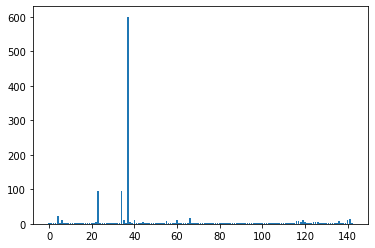

In [50]:
plt.bar(TE_TR_TI_count_dic.keys(), TE_TR_TI_count_dic.values())

In [51]:
set(TE_TR_TI_count_dic.values())

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 15.0,
 16.0,
 22.0,
 94.0,
 96.0,
 600.0}

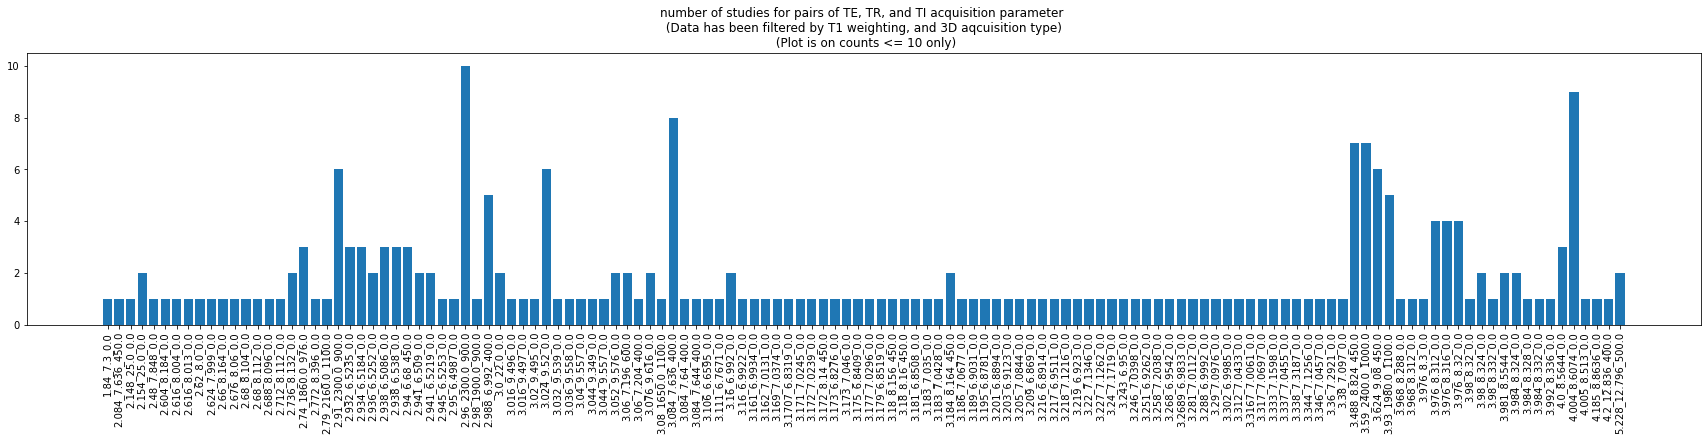

In [52]:
filtered_TE_TR_TI_counts = TE_TR_TI_counts[TE_TR_TI_counts['counts'] < 11]
paprameter_counts_dic = {}
for index, row in filtered_TE_TR_TI_counts.iterrows():
    paprameter_counts_dic[str(row['TE'])+'_'+str(row['TR'])+'_'+str(row['TI'])] = row['counts']
    
plt.figure(figsize = (30, 5))    
X_axis = np.arange(len(paprameter_counts_dic.keys()))
plt.bar(paprameter_counts_dic.keys(), paprameter_counts_dic.values()) 
plt.xticks(X_axis, paprameter_counts_dic.keys(), rotation=90)
plt.title('number of studies for pairs of TE, TR, and TI acquisition parameter \n (Data has been filtered by T1 weighting, and 3D aqcuisition type) \n (Plot is on counts <= 10 only)')
plt.show()
    

In [53]:
filtered_TE_TR_TI_counts = TE_TR_TI_counts[TE_TR_TI_counts['counts'] > 10]
filtered_TE_TR_TI_counts

,TE,TR,TI,counts
4,2.270,1900.000,900.0,22
6,2.520,2300.000,900.0,11
23,2.930,2300.000,900.0,94
34,2.950,2300.000,900.0,96
37,2.980,2300.000,900.0,600
40,3.000,2300.000,900.0,11
60,3.140,1970.000,1100.0,11
66,3.170,1970.000,1100.0,16
119,3.650,2400.000,1000.0,11
140,4.200,13.000,400.0,11


In [54]:
paprameter_counts_dic = {}
for index, row in filtered_TE_TR_TI_counts.iterrows():
    paprameter_counts_dic[str(row['TE'])+'_'+str(row['TR'])+'_'+str(row['TI'])] = row['counts']

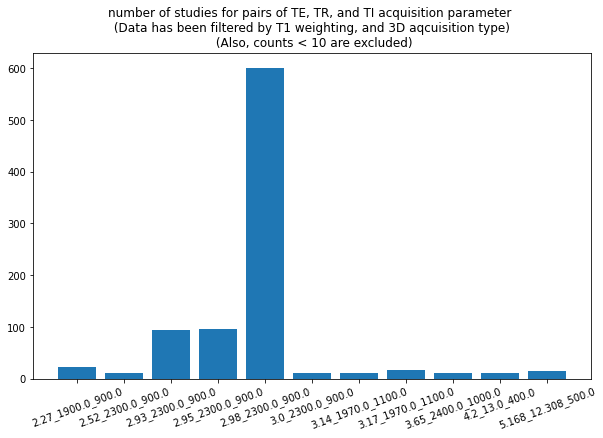

In [62]:
plt.figure(figsize = (10, 6))    
X_axis = np.arange(len(paprameter_counts_dic.keys()))
plt.bar(paprameter_counts_dic.keys(), paprameter_counts_dic.values()) 
plt.xticks(X_axis, paprameter_counts_dic.keys(), rotation=20)
plt.title('number of studies for pairs of TE, TR, and TI acquisition parameter \n (Data has been filtered by T1 weighting, and 3D aqcuisition type) \n (Also, counts < 10 are excluded)')
plt.savefig('TETRTI.png', dpi=1000)
plt.show()


In [119]:
TE_TR_TI__siteKey_counts = filtered_PD_df.groupby(['TE', 'TR', 'TI', 'siteKey']).size().reset_index(name='counts')
TE_TR_TI__siteKey_counts

,TE,TR,TI,siteKey,counts
0,1.840,7.300,0.0,34,1
1,2.084,7.636,450.0,1,1
2,2.148,25.000,0.0,57,1
3,2.154,25.000,0.0,57,2
4,2.270,1900.000,900.0,96,21
...,...,...,...,...,...
169,4.200,12.836,400.0,89,1
170,4.200,13.000,400.0,89,11
171,5.168,12.308,500.0,23,14
172,5.168,12.308,500.0,57,1


In [120]:
filtered_TE_TR_TI__siteKey_counts = TE_TR_TI__siteKey_counts[TE_TR_TI__siteKey_counts['counts'] > 10]
filtered_TE_TR_TI__siteKey_counts

,TE,TR,TI,siteKey,counts
4,2.270,1900.000,900.0,96,21
7,2.520,2300.000,900.0,32,11
25,2.930,2300.000,900.0,120,54
26,2.930,2300.000,900.0,289,30
38,2.950,2300.000,900.0,7,15
42,2.950,2300.000,900.0,32,14
43,2.950,2300.000,900.0,73,13
46,2.950,2300.000,900.0,196,15
47,2.950,2300.000,900.0,290,12
53,2.980,2300.000,900.0,7,84


In [127]:
selected_df = filtered_PD_df[(filtered_PD_df['TE'] == 2.980) & (filtered_PD_df['TR'] == 2300.000) & (filtered_PD_df['TI'] == 900.0)]
print('Field Strength:', set(selected_df['Field Strength'].tolist()))
print('Pulse Sequence:', set(selected_df['Pulse Sequence'].tolist()))
print('Slice Thickness:', set(selected_df['Slice Thickness'].tolist()))
print('Coil:', set(selected_df['Coil'].tolist()))
print('Flip Angle:', set(selected_df['Flip Angle'].tolist()))
print('Acquisition Plane:', set(selected_df['Acquisition Plane'].tolist()))
print('Manufacturer:', set(selected_df['Manufacturer'].tolist()))
print('Mfg Model:', set(selected_df['Mfg Model'].tolist()))



Field Strength: {3.0}
Pulse Sequence: {'GR/IR'}
Slice Thickness: {1.0, 1.2}
Coil: {'Body'}
Flip Angle: {9}
Acquisition Plane: {'SAGITTAL', 'AXIAL'}
Manufacturer: {'SIEMENS'}
Mfg Model: {'Verio', 'TrioTim', 'Biograph_mMR', 'Prisma_fit'}


In [139]:
MFG_Model_counts = selected_df.groupby(['Mfg Model']).size().reset_index(name='counts')
MFG_Model_counts

,Mfg Model,counts
0,Biograph_mMR,26
1,Prisma_fit,17
2,TrioTim,491
3,Verio,66


In [ ]:
Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength'],
      dtype='object')

ویژگی‌های هر کدوم از این دسته‌ها رو ببینم! بعد مثلا اونی که از همه بیشتره رو ببینم میشه کلاستر کرد یا مثلا کلسیفای کرد بر اساس ویژگی‌های دیگه ؟ 
رسما به جای سایت، از اینکه ویژگی‌های مهم سیکونسینگشون یکیه استفاده میکنم :-؟

فور بزنم رو هر کدوم که میخام سی اس وی جدا برای این کاندیشن‌هاش بسازم و دی‌افش رو سیو کنم
بعدش از اینا شاید پیدا شه که می‌شه چی رو مثلا کلسیفای کرد و بعد محتوای بهتر و دقیق‌تری داریم برای اینکه به راحول نشون بدیم

In [128]:
### now check for the 600 status, on the control group too!

filtered_control_df = control_df[(control_df['Weighting'] == 'T1') & (control_df['Acquisition Type'] == '3D')] 

In [130]:
control_TE_TR_TI_counts = filtered_control_df.groupby(['TE', 'TR', 'TI']).size().reset_index(name='counts')


In [134]:
control_TE_TR_TI_counts_bigger10 = control_TE_TR_TI_counts[control_TE_TR_TI_counts['counts'] > 10]
control_TE_TR_TI_counts_bigger10

,TE,TR,TI,counts
1,2.27,1900.0,900.0,12
16,2.98,2300.0,900.0,161


In [137]:
control_TE_TR_TI_counts_smaller10 = control_TE_TR_TI_counts[control_TE_TR_TI_counts['counts'] <= 10]
control_TE_TR_TI_counts_smaller10

,TE,TR,TI,counts
0,1.996,5.8360,450.0,1
2,2.520,2300.0000,900.0,8
3,2.616,7.9930,0.0,1
4,2.616,7.9980,0.0,1
5,2.616,8.0050,0.0,2
6,2.616,8.0110,0.0,2
7,2.616,8.0120,0.0,1
8,2.616,8.0210,0.0,1
9,2.664,8.1120,0.0,1
10,2.680,8.1120,0.0,1


In [136]:
selected_df_control = filtered_control_df[(filtered_control_df['TE'] == 2.980) & (filtered_control_df['TR'] == 2300.000) & (filtered_control_df['TI'] == 900.0)]
print('Field Strength:', set(selected_df_control['Field Strength'].tolist()))
print('Pulse Sequence:', set(selected_df_control['Pulse Sequence'].tolist()))
print('Slice Thickness:', set(selected_df_control['Slice Thickness'].tolist()))
print('Coil:', set(selected_df_control['Coil'].tolist()))
print('Flip Angle:', set(selected_df_control['Flip Angle'].tolist()))
print('Acquisition Plane:', set(selected_df_control['Acquisition Plane'].tolist()))
print('Manufacturer:', set(selected_df_control['Manufacturer'].tolist()))
print('Mfg Model:', set(selected_df_control['Mfg Model'].tolist()))

Field Strength: {3.0}
Pulse Sequence: {'GR/IR'}
Slice Thickness: {1.0}
Coil: {'Body'}
Flip Angle: {9.0}
Acquisition Plane: {'SAGITTAL', 'AXIAL'}
Manufacturer: {'SIEMENS'}
Mfg Model: {'Verio', 'TrioTim'}


### see the distribution of parameter only on TE, TR, and TI without filtering, on whole PD dataset

In [164]:
PD_TE_TR_TI_all_counts = PD_df.groupby(['TE', 'TR', 'TI', 'Acquisition Type', 'Weighting']).size().reset_index(name='counts')
PD_TE_TR_TI_all_counts = PD_TE_TR_TI_all_counts[PD_TE_TR_TI_all_counts['Weighting'] == 'T1']

In [165]:
PD_TE_TR_TI_all_counts[PD_TE_TR_TI_all_counts['counts'] > 10].sort_values(by=['counts'])

,TE,TR,TI,Acquisition Type,Weighting,counts
8,2.520,2300.000,900.0,3D,T1,11
54,3.000,2300.000,900.0,3D,T1,11
75,3.140,1970.000,1100.0,3D,T1,11
142,3.650,2400.000,1000.0,3D,T1,11
166,4.200,13.000,400.0,3D,T1,11
176,5.168,12.308,500.0,3D,T1,15
171,4.630,457.000,0.0,2D,T1,15
169,4.600,467.000,0.0,2D,T1,15
167,4.400,450.000,0.0,2D,T1,15
172,4.630,465.000,0.0,2D,T1,15


In [145]:
PD_TE_TR_TI_all_counts[PD_TE_TR_TI_all_counts['counts'] > 10].sort_values(by=['counts'])

,TE,TR,TI,Weighting,Acquisition Type,counts
166,4.20000,13.00000,400.0,T1,3D,11
142,3.65000,2400.00000,1000.0,T1,3D,11
75,3.14000,1970.00000,1100.0,T1,3D,11
54,3.00000,2300.00000,900.0,T1,3D,11
272,80.00000,2999.99951,0.0,PD,2D,11
8,2.52000,2300.00000,900.0,T1,3D,11
478,151.40401,11000.00000,2250.0,T2,2D,12
297,93.77200,5600.00000,0.0,PD,2D,12
213,15.00000,4070.00000,0.0,PD,2D,12
414,120.00000,4070.00000,0.0,T2,2D,12


In [158]:
PD_TE_TR_TI_all_counts_mixed['TI_TE_TR'] = PD_TE_TR_TI_all_counts['TI'].astype(str) + '_' + PD_TE_TR_TI_all_counts['TE'].astype(str) + '_' + PD_TE_TR_TI_all_counts['TR'].astype(str)
# PD_TE_TR_TI_all_counts_mixed.head()

In [159]:
PD_TE_TR_TI_all_counts_mixed.head()

0        0.0_0.0
1       0.0_1.84
2    450.0_2.084
3      0.0_2.148
4      0.0_2.154
dtype: object

In [146]:
اینو بکشم بر اساس این دو تا جدا جدا 
یه کار دیگه هم اینکه کلن بر اساس مدل گرفتن که سجیتاله یا اکسیال یا .. دسته بندی کنیم ببینیم که اون تفاوت داره یا نه

SyntaxError: invalid syntax (121607545.py, line 1)

In [ ]:
X_axis = np.arange(len(siteKey_lists))
plt.figure(figsize = (15, 5)) 
plt.bar(X_axis - 0.2, female_counts, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male_counts, 0.4, label = 'Male')
  
plt.xticks(X_axis, siteKey_lists)
plt.xlabel("Groups")
plt.ylabel("Number of Studies")
plt.title("Counts")
plt.legend()
plt.show()